In [339]:
import pandas as pd
import numpy as np 
import os
import matplotlib

In [340]:
sch=pd.read_csv('Resources/schools_complete.csv')
sch.head()


,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [341]:
# use cleaned data from 'clean_up' notebook
stu=pd.read_csv('Resources/cleaned_students_complete.csv')
stu.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [342]:
school_data=os.path.join("Resources", "schools_complete.csv")
student_data=os.path.join("Resources", "Resources/cleaned_students_complete.csv")


In [343]:
sch.count()

School ID      15
school_name    15
type           15
size           15
budget         15
dtype: int64

In [344]:
#check for null values in both dataframes using notnull (boolean) along with sum all zeros means no missing values

In [345]:
sch.notnull().sum()

School ID      15
school_name    15
type           15
size           15
budget         15
dtype: int64

In [346]:
stu.notnull().sum()

Student ID       39170
student_name     39170
gender           39170
grade            39170
school_name      39170
reading_score    39170
math_score       39170
dtype: int64

In [347]:
#merge 
df=pd.merge(stu, sch, on=['school_name', 'school_name'])

In [348]:
# df.head()

In [349]:
# df['Student ID'].count()

In [350]:
# total district budget
district_budget=sch['budget'].sum()
district_budget

24649428

In [351]:
sc_name=df['school_name'].unique()
schs=[]
for sc in sc_name:
    schs.append(sc)
    
schs

['Huang High School',
 'Figueroa High School',
 'Shelton High School',
 'Hernandez High School',
 'Griffin High School',
 'Wilson High School',
 'Cabrera High School',
 'Bailey High School',
 'Holden High School',
 'Pena High School',
 'Wright High School',
 'Rodriguez High School',
 'Johnson High School',
 'Ford High School',
 'Thomas High School']

In [352]:
# average reading schore
av_rd_sc=df['reading_score'].mean()
av_rd_sc

81.87784018381414

In [353]:
#avg math score
av_mt_sc=df['math_score'].mean()
av_mt_sc

78.98537145774827

In [354]:
#passing math 
ps_mt=df['math_score']>=70
# ps_mt




In [355]:
#pass reading
ps_rd=df['reading_score']>=70
# ps_mt

In [356]:
# add passing students to dataframe
#passing rd 
ps_rd=df[df['reading_score']>=70]
#passing math 
ps_mt=df[df['math_score']>=70]

In [357]:
#ps_rd.head()

# ps_mt.head()

In [358]:
st_ct=df['Student ID'].count()
st_ct.dtype
st_ct

39170

In [359]:
#passing reading and math (bt='both)
ps_bt=df[(df['reading_score']>=70) & (df['math_score']>=70)]
ps_bt_ct=ps_bt['student_name'].count()

In [360]:
#how many students passed math
ps_mt_ct=ps_mt['student_name'].count()
ps_mt_ct.dtype
ps_mt_ct

29370

In [361]:
# students passed reading
ps_rd_ct=ps_rd['student_name'].count()
ps_rd_ct.dtype
ps_rd_ct

33610

In [362]:
#passing percentages
pc_rd = ps_rd_ct / float(st_ct) * 100
print(f'passing reading percentage is: {pc_rd} ')
pc_mt = ps_mt_ct / float(st_ct) * 100
print(f'passing reading percentage is: {pc_mt} ')
pc_bt = ps_bt_ct / float(st_ct) * 100
print(f'student percentage who passed both is is: {pc_bt} ')

passing reading percentage is: 85.80546336482001 
passing reading percentage is: 74.9808526933878 
student percentage who passed both is is: 65.17232575950983 


In [363]:
sc_ct=len(df['school_name'].unique())
sc_ct

15

In [364]:
#summary of district stats
dst = pd.DataFrame ([{
    'School Count': sc_ct,
    'Student Count' : st_ct,
    'Budget' : district_budget,
    'Avg. Math' : av_mt_sc,
    'Avg. Reading': av_rd_sc,
    'Pass Math' : pc_mt,
    'Pass Read' : pc_rd,
    'Pass Both' : pc_bt,
}])

dst

,School Count,Student Count,Budget,Avg. Math,Avg. Reading,Pass Math,Pass Read,Pass Both
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,65.172326


In [365]:
#reformat

dst["Student Count"] = dst["Student Count"].map("{:,}".format)
dst.head()

,School Count,Student Count,Budget,Avg. Math,Avg. Reading,Pass Math,Pass Read,Pass Both
0,15,"39,170",24649428,78.985371,81.87784,74.980853,85.805463,65.172326


In [366]:
dst["Budget"] = dst["Budget"].map('${:,.2f}'.format)
dst.head()

,School Count,Student Count,Budget,Avg. Math,Avg. Reading,Pass Math,Pass Read,Pass Both
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


In [367]:
dst["Avg. Math"] = dst["Avg. Math"].map('{:.1f}'.format)
dst.head()

,School Count,Student Count,Budget,Avg. Math,Avg. Reading,Pass Math,Pass Read,Pass Both
0,15,"39,170","$24,649,428.00",79.0,81.87784,74.980853,85.805463,65.172326


In [368]:
dst["Avg. Reading"] = dst["Avg. Reading"].map('{:.1f}'.format)
dst.head()

,School Count,Student Count,Budget,Avg. Math,Avg. Reading,Pass Math,Pass Read,Pass Both
0,15,"39,170","$24,649,428.00",79.0,81.9,74.980853,85.805463,65.172326


In [369]:
dst["Pass Math"] = dst["Pass Math"].map("{:.0f}".format)
dst.head()

,School Count,Student Count,Budget,Avg. Math,Avg. Reading,Pass Math,Pass Read,Pass Both
0,15,"39,170","$24,649,428.00",79.0,81.9,75,85.805463,65.172326


In [370]:
dst["Pass Both"] = dst["Pass Both"].map("{:.0f}".format)
dst.head()

,School Count,Student Count,Budget,Avg. Math,Avg. Reading,Pass Math,Pass Read,Pass Both
0,15,"39,170","$24,649,428.00",79.0,81.9,75,85.805463,65


In [371]:
dst["Pass Read"] = dst["Pass Read"].map("{:.0f}".format)
dst.head()

,School Count,Student Count,Budget,Avg. Math,Avg. Reading,Pass Math,Pass Read,Pass Both
0,15,"39,170","$24,649,428.00",79.0,81.9,75,86,65


In [372]:
# establish school types / school dataframe, not combined one
schls=sch.set_index(["school_name"])["type"]
schls


school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [373]:
#dataframe of school types
sc_tp=pd.DataFrame(schls)
sc_tp

,type
school_name,
Huang High School,District
Figueroa High School,District
Shelton High School,Charter
Hernandez High School,District
Griffin High School,Charter
Wilson High School,Charter
Cabrera High School,Charter
Bailey High School,District
Holden High School,Charter


In [374]:
#students per school (large dataframe)
st_ct_sc=df['school_name'].value_counts()
st_ct_sc

Bailey High School       4976
Johnson High School      4761
Hernandez High School    4635
Rodriguez High School    3999
Figueroa High School     2949
Huang High School        2917
Ford High School         2739
Wilson High School       2283
Cabrera High School      1858
Wright High School       1800
Shelton High School      1761
Thomas High School       1635
Griffin High School      1468
Pena High School          962
Holden High School        427
Name: school_name, dtype: int64

In [375]:
# budget per school (school dataframe)
bt_sc=sch.set_index(['school_name'])['budget']
bt_sc

school_name
Huang High School        1910635
Figueroa High School     1884411
Shelton High School      1056600
Hernandez High School    3022020
Griffin High School       917500
Wilson High School       1319574
Cabrera High School      1081356
Bailey High School       3124928
Holden High School        248087
Pena High School          585858
Wright High School       1049400
Rodriguez High School    2547363
Johnson High School      3094650
Ford High School         1763916
Thomas High School       1043130
Name: budget, dtype: int64

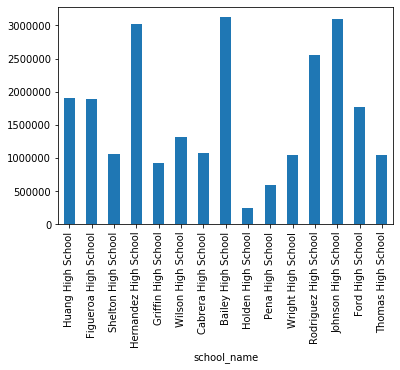

In [470]:
bt_sc.plot(kind='bar')
plt.savefig('school_budget.png')

In [377]:
# per capita spending individual schools (budget per school divided by student count)
sc_cap=bt_sc/st_ct_sc
sc_cap

Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

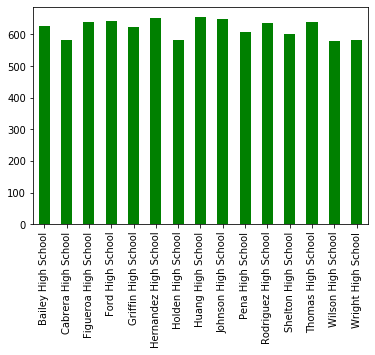

In [469]:
sc_cap.plot(kind='bar', color='green')
plt.savefig('per_capita_spend.png')

In [379]:
#school reading and math scores
sc_mt_sc = df.groupby(["school_name"]).mean()["math_score"]
sc_rd_sc = df.groupby(["school_name"]).mean()["reading_score"]

In [380]:
#avg math scores per school 
sc_mt_sc

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

In [381]:
# avg reading scores per school 
sc_rd_sc

school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64

In [382]:
# Calculate the passing scores by creating a filtered DataFrame.
mt_pass = df[(df["math_score"] >= 70)]
rd_pass = df[(df["reading_score"] >= 70)]

In [383]:
#how many students pass math and reading per school???
#math 
sch_mt_pass=mt_pass.groupby(['school_name']).count()['student_name']
#reading
sch_rd_pass=rd_pass.groupby(['school_name']).count()['student_name']

In [384]:
#sch_mt_pass

In [385]:
#sch_rd_pass

In [386]:
# Calculate the percentage of passing math and reading scores per school. (students passing divided by student count)
per_sch_mt_pas = sch_mt_pass / st_ct_sc * 100
#per_sch_mt_pas
per_sch_rd_pas = sch_rd_pass / st_ct_sc * 100
# per_sch_rd_pas

In [387]:
#how many passed both math and reading per school?


sch_bt_pass=df[(df["reading_score"] >= 70) & (df["math_score"] >= 70)]
sch_bt_pass

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
9,9,Matthew Greene,M,10th,Huang High School,96,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [388]:
# Calculate the number of students passing math and passing reading by school.
sch_bt_pass = sch_bt_pass.groupby(["school_name"]).count()["student_name"]
sch_bt_pass

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
Name: student_name, dtype: int64

In [389]:
#overall passing percentage (school passing number divided by student count)
pas_pc_sc_st=sch_bt_pass / st_ct_sc * 100
pas_pc_sc_st

Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

In [418]:


per_school_summary_df = pd.DataFrame({
    "School Type": schls,
    "Total Students": st_ct_sc,
    "Total School Budget": bt_sc,
    "Per Student Budget": sc_cap,
    "Average Math Score": sc_mt_sc,
    "Average Reading Score": sc_rd_sc,
    "% Passing Math": per_sch_mt_pas,
    "% Passing Reading": per_sch_rd_pas,
    "% Overall Passing": pas_pc_sc_st})

per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455


In [391]:
# Format the Total School Budget and the Per Student Budget.
per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.2f}".format)
per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.2f}".format)
# per_school_summary_df["Average Math Score"] = per_school_summary_df["Average Math Score"].map("%{:.2f}".format)
# Display the DataFrame.
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [455]:
# Sort and show top five schools.
top_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=False)
top_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,94.594595,95.945946,90.540541


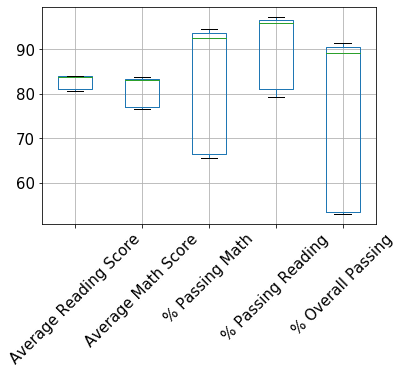

In [456]:
top_schools.boxplot(column=['Average Reading Score', 'Average Math Score', '% Passing Math', '% Passing Reading', '% Overall Passing'], rot=45, fontsize=15)
plt.savefig('top_boxplot.png')

In [393]:
# Sort and show top five schools.
bottom_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=True)
bottom_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


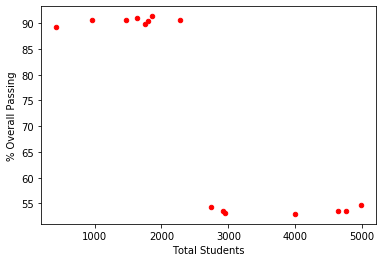

In [471]:
bottom_schools.plot(kind='scatter', x='Total Students', y='% Overall Passing',  color='red')
plt.savefig('density_passing.png')

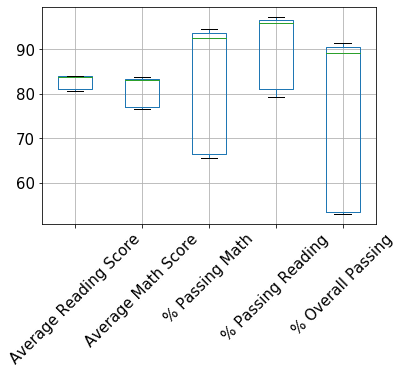

In [453]:

bottom_schools.boxplot(column=['Average Reading Score', 'Average Math Score', '% Passing Math', '% Passing Reading', '% Overall Passing'], rot=45, fontsize=15)
plt.savefig('bottom_boxplot.png')

In [394]:
# Create a Series of scores by grade levels using conditionals.
ninth_graders = df[(df["grade"] == "9th")]
tenth_graders = df[(df["grade"] == "10th")]
eleventh_graders = df[(df["grade"] == "11th")]
twelfth_graders = df[(df["grade"] == "12th")]

ninth_graders.head(5)

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
12,12,Brittney Walker,F,9th,Huang High School,64,79,0,District,2917,1910635
13,13,William Long,M,9th,Huang High School,71,79,0,District,2917,1910635


In [395]:
#group by school name

# Group each school Series by the school name for the average math score.
ninth_grade_math_scores = ninth_graders.groupby(["school_name"]).mean()["math_score"]
tenth_grade_math_scores = tenth_graders.groupby(["school_name"]).mean()["math_score"]
eleventh_grade_math_scores = eleventh_graders.groupby(["school_name"]).mean()["math_score"]
twelfth_grade_math_scores = twelfth_graders.groupby(["school_name"]).mean()["math_score"]


ninth_grade_math_scores

school_name
Bailey High School       77.083676
Cabrera High School      83.094697
Figueroa High School     76.403037
Ford High School         77.361345
Griffin High School      82.044010
Hernandez High School    77.438495
Holden High School       83.787402
Huang High School        77.027251
Johnson High School      77.187857
Pena High School         83.625455
Rodriguez High School    76.859966
Shelton High School      83.420755
Thomas High School       83.590022
Wilson High School       83.085578
Wright High School       83.264706
Name: math_score, dtype: float64

In [396]:
# Group each school Series by the school name for the average reading score.
ninth_grade_reading_scores = ninth_graders.groupby(["school_name"]).mean()["reading_score"]
tenth_grade_reading_scores = tenth_graders.groupby(["school_name"]).mean()["reading_score"]
eleventh_grade_reading_scores = eleventh_graders.groupby(["school_name"]).mean()["reading_score"]
twelfth_grade_reading_scores = twelfth_graders.groupby(["school_name"]).mean()["reading_score"]

ninth_grade_reading_scores

school_name
Bailey High School       81.303155
Cabrera High School      83.676136
Figueroa High School     81.198598
Ford High School         80.632653
Griffin High School      83.369193
Hernandez High School    80.866860
Holden High School       83.677165
Huang High School        81.290284
Johnson High School      81.260714
Pena High School         83.807273
Rodriguez High School    80.993127
Shelton High School      84.122642
Thomas High School       83.728850
Wilson High School       83.939778
Wright High School       83.833333
Name: reading_score, dtype: float64

In [397]:
# Combine each Series for average math scores by school into single DataFrame.
math_scores_by_grade = pd.DataFrame({
               "9th": ninth_grade_math_scores, 
               "10th": tenth_grade_math_scores,
               "11th": eleventh_grade_math_scores, 
               "12th": twelfth_grade_math_scores})

math_scores_by_grade.head()

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164


In [398]:
# Combine each Series for average reading scores by school into single DataFrame.
reading_scores_by_grade = pd.DataFrame({
              "9th": ninth_grade_reading_scores, 
              "10th": tenth_grade_reading_scores,
              "11th": eleventh_grade_reading_scores,             
              "12th": twelfth_grade_reading_scores})

reading_scores_by_grade.head()

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699


In [399]:
#format
math_scores_by_grade["9th"] = math_scores_by_grade["9th"].map("{:.1f}".format)
math_scores_by_grade["10th"] = math_scores_by_grade["10th"].map("{:.1f}".format)
math_scores_by_grade["11th"] = math_scores_by_grade["11th"].map("{:.1f}".format)
math_scores_by_grade["12th"] = math_scores_by_grade["12th"].map("{:.1f}".format)

In [400]:
math_scores_by_grade

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4
Hernandez High School,77.4,77.3,77.1,77.2
Holden High School,83.8,83.4,85.0,82.9
Huang High School,77.0,75.9,76.4,77.2
Johnson High School,77.2,76.7,77.5,76.9


In [401]:
# Format each grade column.
reading_scores_by_grade["9th"] = reading_scores_by_grade["9th"].map("{:,.1f}".format)
reading_scores_by_grade["10th"] = reading_scores_by_grade["10th"].map("{:,.1f}".format)
reading_scores_by_grade["11th"] = reading_scores_by_grade["11th"].map("{:,.1f}".format)
reading_scores_by_grade["12th"] = reading_scores_by_grade["12th"].map("{:,.1f}".format)

In [402]:
reading_scores_by_grade

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0
Hernandez High School,80.9,80.7,81.4,80.9
Holden High School,83.7,83.3,83.8,84.7
Huang High School,81.3,81.5,81.4,80.3
Johnson High School,81.3,80.8,80.6,81.2


In [403]:
# Establish the spending bins and group names.
spending_bins = [0, 585, 630, 645, 675]
group_names = ["<$584", "$585-629", "$630-644", "$645-675"]

In [404]:
# Categorize spending based on the bins.
per_school_summary_df["Spending Ranges (Per Student)"] = pd.cut(sc_cap, spending_bins, labels=group_names)
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-629
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$584
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-644
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-629
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-675
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$584
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-675
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-675
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,$585-629


In [405]:
# Calculate averages for the desired columns. 
spending_math_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
spending_reading_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
spending_passing_math = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
spending_passing_reading = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
overall_passing_spending = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

In [406]:
spending_summary_df = pd.DataFrame({
          "Average Math Score" : spending_math_scores,
          "Average Reading Score": spending_reading_scores,
          "% Passing Math": spending_passing_math,
          "% Passing Reading": spending_passing_reading,
          "% Overall Passing": overall_passing_spending})

# Display results
spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.455399,83.933814,93.460096,96.610877,90.369459
$585-629,81.899826,83.155286,87.133538,92.718205,81.418596
$630-644,78.518855,81.624473,73.484209,84.391793,62.857656
$645-675,76.997210,81.027843,66.164813,81.133951,53.526855


In [407]:
# Formatting. 
spending_summary_df["Average Math Score"] = spending_summary_df["Average Math Score"].map("{:.1f}".format)
spending_summary_df["Average Reading Score"] = spending_summary_df["Average Reading Score"].map("{:.1f}".format)
spending_summary_df["% Passing Math"] = spending_summary_df["% Passing Math"].map("{:.0f}".format)
spending_summary_df["% Passing Reading"] = spending_summary_df["% Passing Reading"].map("{:.0f}".format)
spending_summary_df["% Overall Passing"] = spending_summary_df["% Overall Passing"].map("{:.0f}".format)

spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.5,83.9,93,97,90
$585-629,81.9,83.2,87,93,81
$630-644,78.5,81.6,73,84,63
$645-675,77.0,81.0,66,81,54


KeyError: '%Overall Passing'

In [461]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [462]:
# Categorize spending based on the bins.
per_school_summary_df["School Size"] = pd.cut(per_school_summary_df["Total Students"], size_bins, labels=group_names)

per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)


In [463]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary_df.groupby(["School Size"]).mean()["% Overall Passing"]

In [464]:

# Assemble into DataFrame. 
size_summary_df = pd.DataFrame({
          "Average Math Score" : size_math_scores,
          "Average Reading Score": size_reading_scores,
          "% Passing Math": size_passing_math,
          "% Passing Reading": size_passing_reading,
          "% Overall Passing": size_overall_passing})

size_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


In [465]:
# Formatting. 
size_summary_df["Average Math Score"] = size_summary_df["Average Math Score"].map("{:.1f}".format)
size_summary_df["Average Reading Score"] = size_summary_df["Average Reading Score"].map("{:.1f}".format)
size_summary_df["% Passing Math"] = size_summary_df["% Passing Math"].map("{:.0f}".format)
size_summary_df["% Passing Reading"] = size_summary_df["% Passing Reading"].map("{:.0f}".format)
size_summary_df["% Overall Passing"] = size_summary_df["% Overall Passing"].map("{:.0f}".format)

size_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.8,83.9,94,96,90
Medium (1000-2000),83.4,83.9,94,97,91
Large (2000-5000),77.7,81.3,70,83,58


In [466]:
# Calculate averages for the desired columns. 
type_math_scores = per_school_summary_df.groupby(["School Type"]).mean()["Average Math Score"]
type_reading_scores = per_school_summary_df.groupby(["School Type"]).mean()["Average Reading Score"]
type_passing_math = per_school_summary_df.groupby(["School Type"]).mean()["% Passing Math"]
type_passing_reading = per_school_summary_df.groupby(["School Type"]).mean()["% Passing Reading"]
type_overall_passing = per_school_summary_df.groupby(["School Type"]).mean()["% Overall Passing"]

In [467]:
# Assemble into DataFrame. 
type_summary_df = pd.DataFrame({
          "Average Math Score" : type_math_scores,
          "Average Reading Score": type_reading_scores,
          "% Passing Math": type_passing_math,
          "% Passing Reading": type_passing_reading,
          "% Overall Passing": type_overall_passing})

type_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


In [468]:
# Formatting. 
type_summary_df["Average Math Score"] = type_summary_df["Average Math Score"].map("{:.1f}".format)
type_summary_df["Average Reading Score"] = type_summary_df["Average Reading Score"].map("{:.1f}".format)
type_summary_df["% Passing Math"] = type_summary_df["% Passing Math"].map("{:.0f}".format)
type_summary_df["% Passing Reading"] = type_summary_df["% Passing Reading"].map("{:.0f}".format)
type_summary_df["% Overall Passing"] = type_summary_df["% Overall Passing"].map("{:.0f}".format)

type_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.5,83.9,94,97,90
District,77.0,81.0,67,81,54
